<a href="https://colab.research.google.com/github/neehaanzum/Image-Classification-Model/blob/main/Image_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)

# Define the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),         # Flatten the 28x28 images
    Dense(128, activation='relu'),         # First hidden layer
    Dense(64, activation='relu'),          # Second hidden layer
    Dense(10, activation='softmax')        # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (no test set evaluation)
model.fit(x_train, y_train, epochs=5, batch_size=32)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8753 - loss: 0.4250
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9676 - loss: 0.1060
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9774 - loss: 0.0691
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9828 - loss: 0.0532
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9874 - loss: 0.0392


In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to include channel dimension and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Conv layer
    MaxPooling2D(pool_size=(2, 2)),                                  # Max pooling
    Conv2D(64, (3, 3), activation='relu'),                           # Another conv layer
    MaxPooling2D(pool_size=(2, 2)),                                  # Another max pooling
    Flatten(),                                                       # Flatten the 2D features
    Dense(64, activation='relu'),                                    # Dense layer
    Dense(10, activation='softmax')                                  # Output layer
])

# Compile the model using sparse categorical crossentropy
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (no test set evaluation)
model.fit(x_train, y_train, epochs=5, batch_size=32)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8953 - loss: 0.3310
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9859 - loss: 0.0464
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9897 - loss: 0.0319
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 24ms/step - accuracy: 0.9934 - loss: 0.0200
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9946 - loss: 0.0171


In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize input data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using 20% of training data as validation set
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.8819 - loss: 0.3781 - val_accuracy: 0.9824 - val_loss: 0.0605
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9817 - loss: 0.0582 - val_accuracy: 0.9862 - val_loss: 0.0472
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9900 - loss: 0.0331 - val_accuracy: 0.9866 - val_loss: 0.0462
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9920 - loss: 0.0256 - val_accuracy: 0.9878 - val_loss: 0.0413
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9937 - loss: 0.0186 - val_accuracy: 0.9893 - val_loss: 0.0387
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9878 - loss: 0.0365
Test Loss: 0.0312, Test Accuracy: 0.9895


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.8895 - loss: 0.3618 - val_accuracy: 0.9819 - val_loss: 0.0625
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9841 - loss: 0.0521 - val_accuracy: 0.9829 - val_loss: 0.0556
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9888 - loss: 0.0363 - val_accuracy: 0.9880 - val_loss: 0.0416
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9917 - loss: 0.0258 - val_accuracy: 0.9852 - val_loss: 0.0460
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9947 - loss: 0.0170 - val_accuracy: 0.9845 - val_loss: 0.0557
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9817 - loss: 0.0561
Test Loss: 0.0446, Test Accuracy: 0.9856


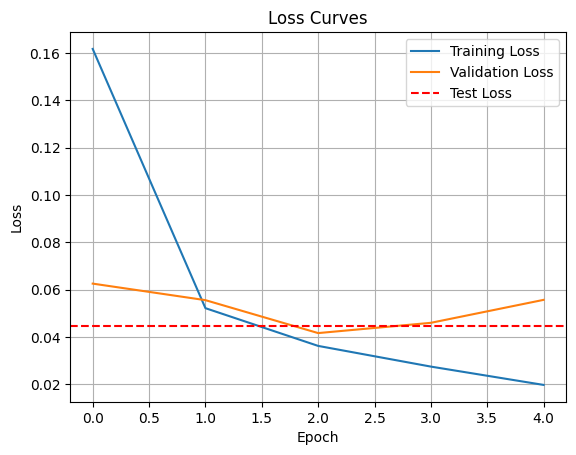

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation split
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='red', linestyle='--', label='Test Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.8898 - loss: 0.3491 - val_accuracy: 0.9822 - val_loss: 0.0598
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9832 - loss: 0.0543 - val_accuracy: 0.9870 - val_loss: 0.0430
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9889 - loss: 0.0356 - val_accuracy: 0.9891 - val_loss: 0.0401
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.9869 - val_loss: 0.0461
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.9941 - loss: 0.0179 - val_accuracy: 0.9893 - val_loss: 0.0421
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


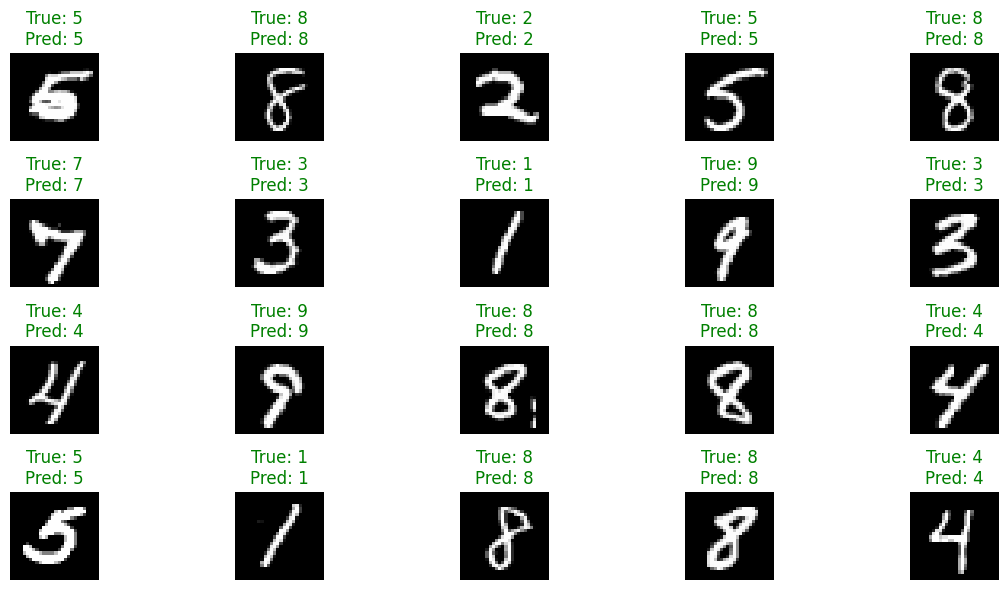

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.datasets import mnist

# Load and preprocess MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_reshaped = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Build and train the model as before
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Predict 20 random samples from training set
indices = random.sample(range(len(x_train)), 20)
sample_images = x_train[indices]
sample_images_input = x_train_reshaped[indices]
true_labels = y_train[indices]
predicted_labels = np.argmax(model.predict(sample_images_input), axis=1)

# Plotting
plt.figure(figsize=(12, 6))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.axis('off')

    if predicted_labels[i] == true_labels[i]:
        color = 'green'
    else:
        color = 'red'

    plt.title(f"True: {true_labels[i]}\nPred: {predicted_labels[i]}", color=color)

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


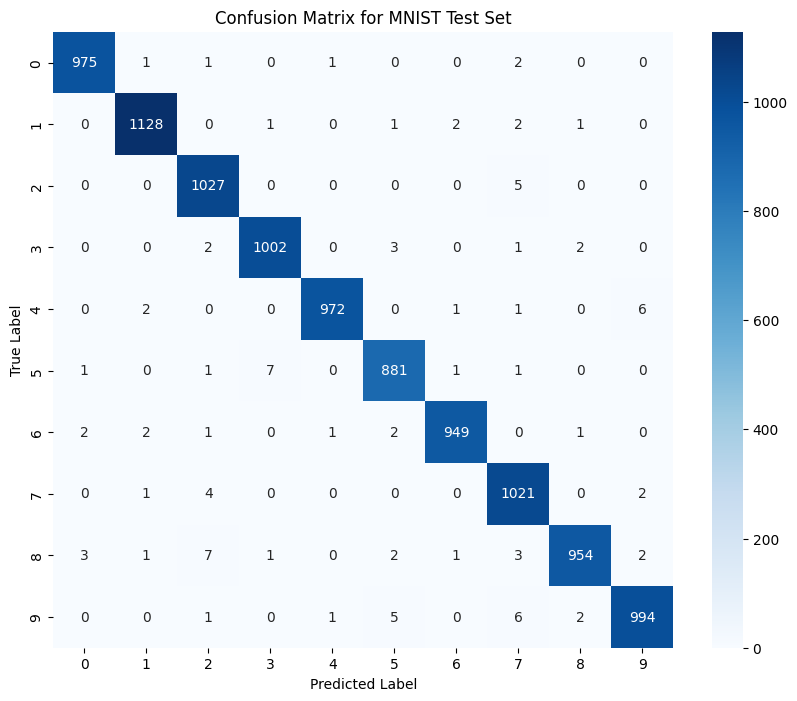

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_probs = model.predict(x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Test Set')
plt.show()


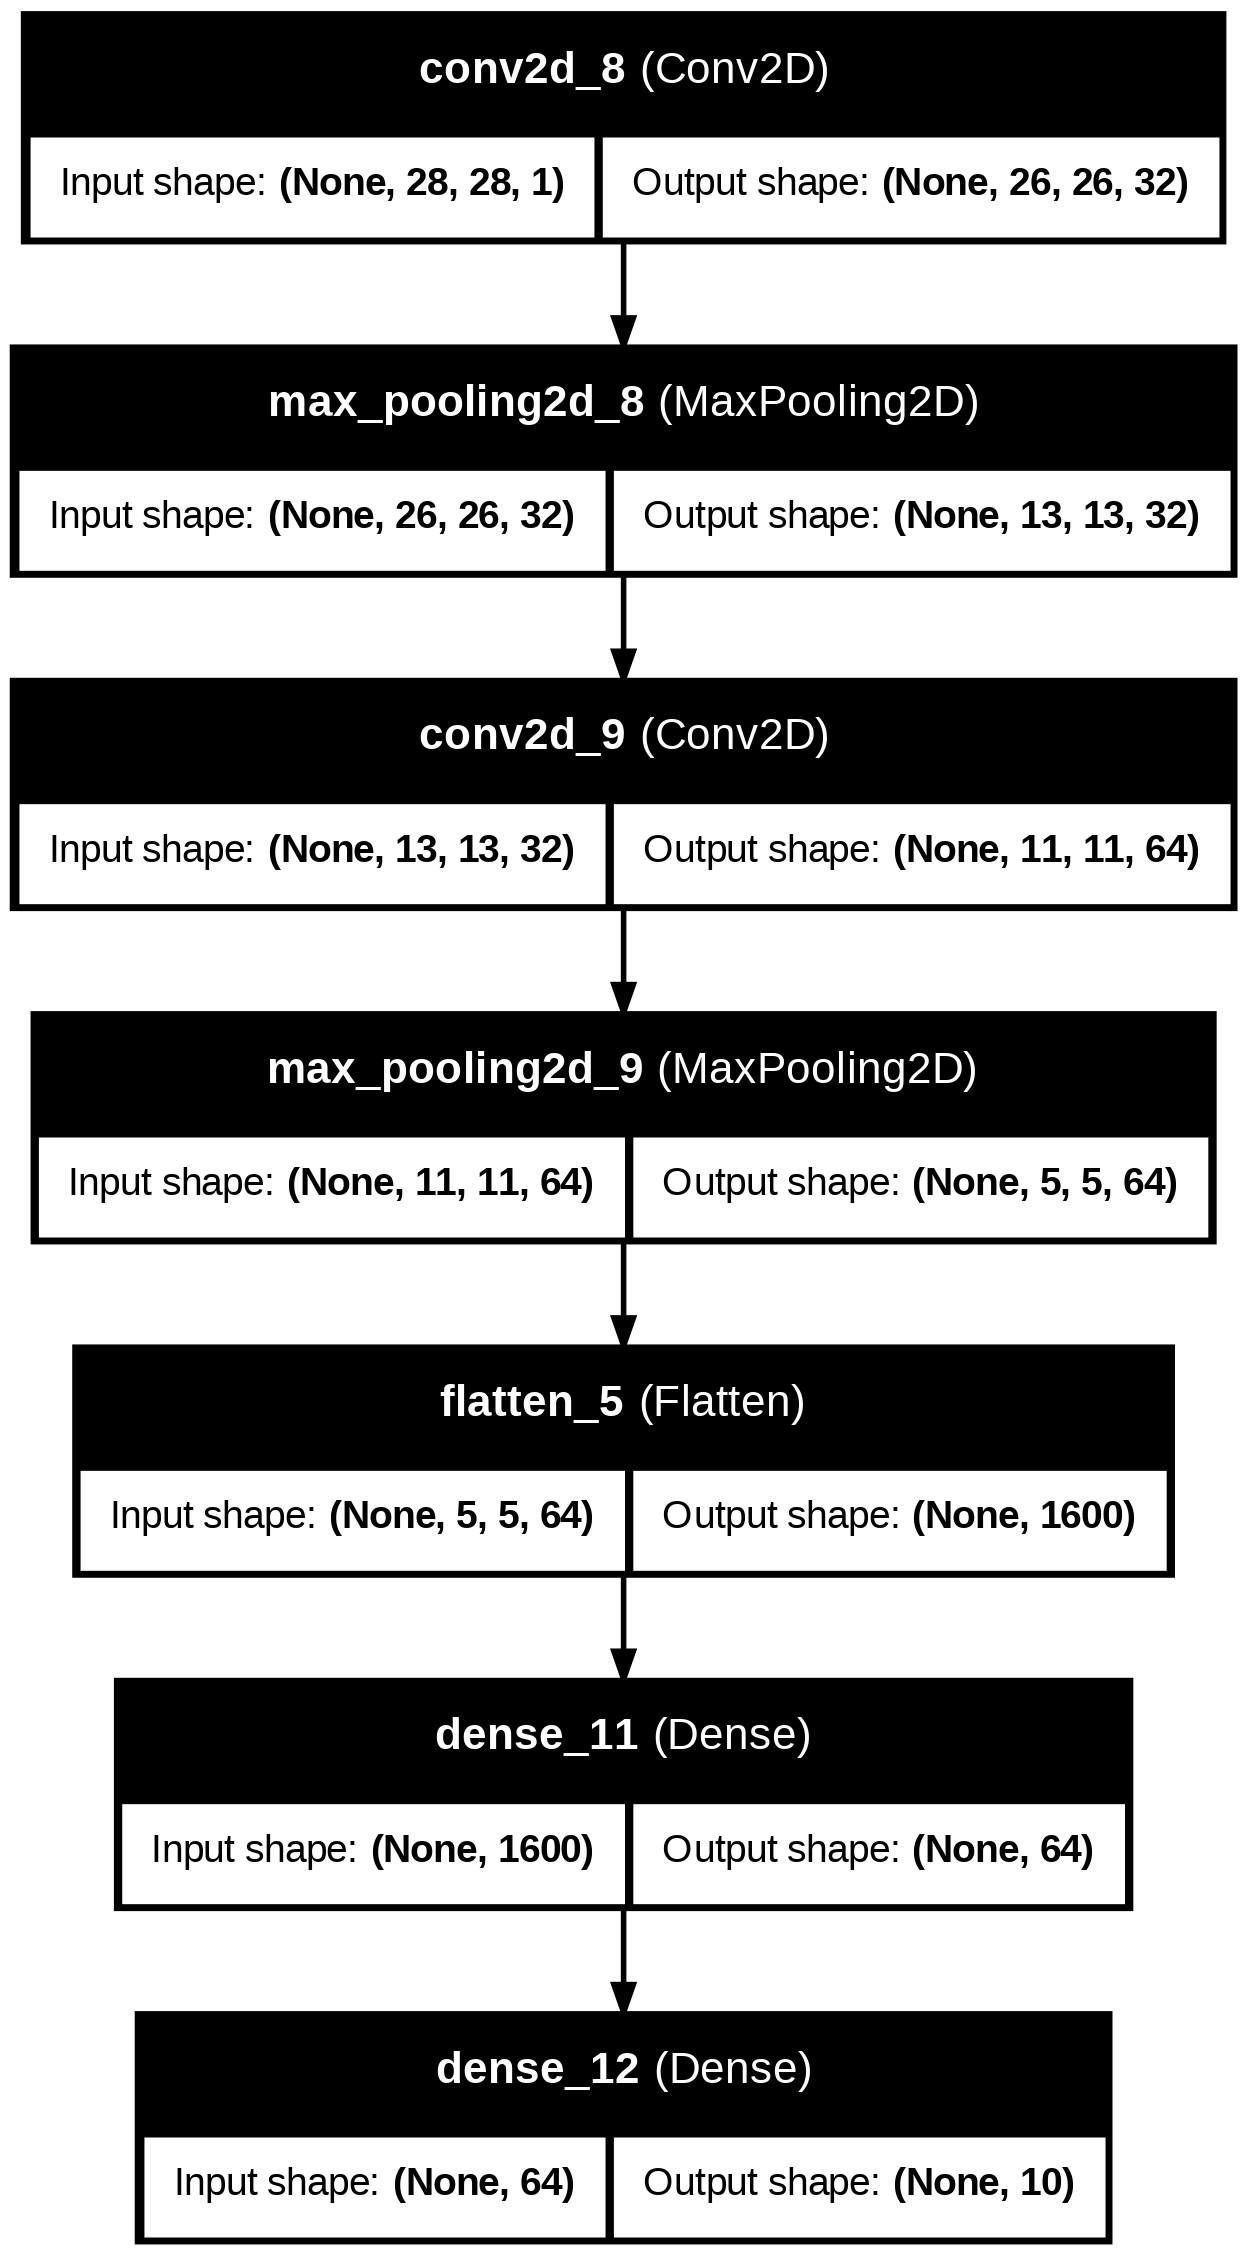

In [9]:
from tensorflow.keras.utils import plot_model

# Plot the model's structure
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


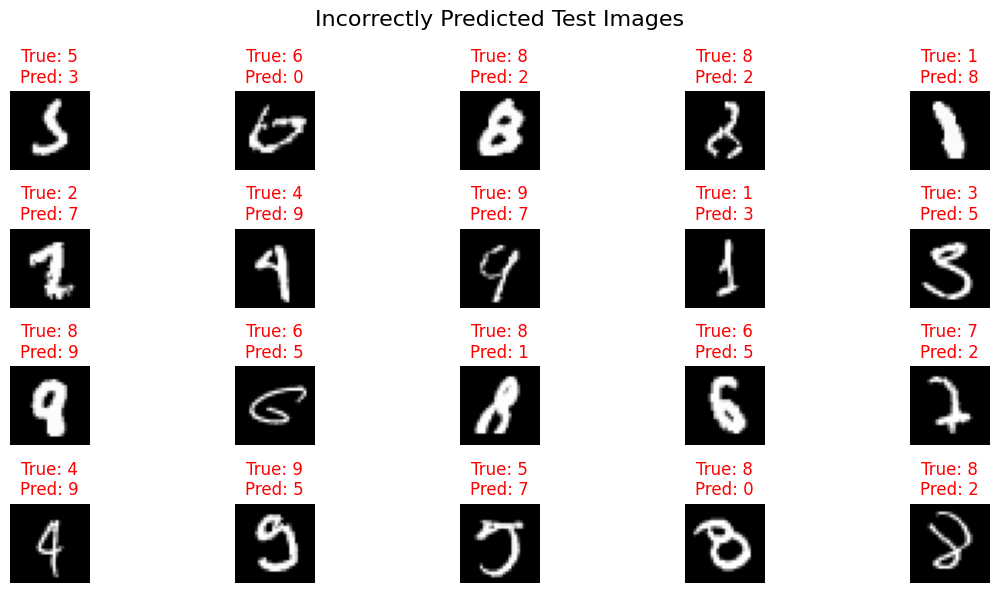

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Preprocess test data
x_test_processed = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Get predictions
y_pred_probs = model.predict(x_test_processed)
y_pred = np.argmax(y_pred_probs, axis=1)

# Find misclassified indices
misclassified_indices = np.where(y_pred != y_test)[0]

# Show first 20 misclassified images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(misclassified_indices[:20]):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.axis('off')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}", color='red')

plt.suptitle("Incorrectly Predicted Test Images", fontsize=16)
plt.tight_layout()
plt.show()


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get the predicted labels from the model's output probabilities
y_pred = np.argmax(model.predict(x_test), axis=-1)

# Convert multilabel-indicator labels to multiclass labels
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test = np.argmax(y_test, axis=-1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the classification report
print(classification_report(y_test, y_pred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

